In [132]:
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
food_consumption = pd.read_csv('food_consumption.csv', index_col=0)
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [158]:
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']
be_consumption.head()

,country,food_category,consumption,co2_emission
397,Belgium,pork,38.65,136.80
398,Belgium,poultry,12.20,13.11
399,Belgium,beef,15.63,482.31
400,Belgium,lamb_goat,1.32,46.23
401,Belgium,fish,18.97,30.29


In [135]:
us_consumption = food_consumption[food_consumption['country'] == 'USA']
us_consumption.head()

,country,food_category,consumption,co2_emission
56,USA,pork,27.64,97.83
57,USA,poultry,50.01,53.72
58,USA,beef,36.24,1118.29
59,USA,lamb_goat,0.43,15.06
60,USA,fish,12.35,19.72


In [136]:
be_consumption['consumption'].agg(['mean', 'median'])

mean      42.132727
median    12.590000
Name: consumption, dtype: float64

In [137]:
us_consumption['consumption'].agg(['mean', 'median'])

mean      44.65
median    14.58
Name: consumption, dtype: float64

In [138]:
be_us_consumption = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]
be_us_consumption.head()

,country,food_category,consumption,co2_emission
56,USA,pork,27.64,97.83
57,USA,poultry,50.01,53.72
58,USA,beef,36.24,1118.29
59,USA,lamb_goat,0.43,15.06
60,USA,fish,12.35,19.72


In [139]:
be_us_consumption.groupby('country')['consumption'].agg(['mean', 'median'])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


In [140]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
rice_consumption.head()

,country,food_category,consumption,co2_emission
9,Argentina,rice,8.77,11.22
20,Australia,rice,11.03,14.12
31,Albania,rice,7.78,9.96
42,Iceland,rice,3.89,4.98
53,New Zealand,rice,9.16,11.72


<Axes: >

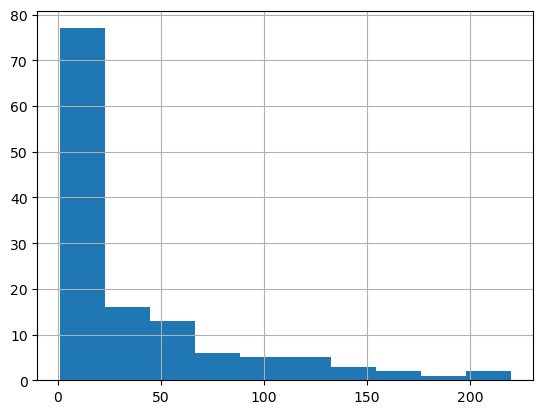

In [141]:
rice_consumption['co2_emission'].hist()

In [159]:
rice_consumption['co2_emission'].agg(['mean', 'median'])

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64

In [142]:
np.quantile(food_consumption['co2_emission'] , [0,.25,0.5,0.75,1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [143]:
np.quantile(food_consumption['co2_emission'], [0,0.2,0.4,0.6,0.8,1])

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [144]:
np.quantile(food_consumption['co2_emission'], np.linspace(0,1, 11))

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

In [145]:
food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std'])

,var,std
food_category,,
beef,88748.408132,297.906710
dairy,17671.891985,132.935669
eggs,21.371819,4.622966
fish,921.637349,30.358481
lamb_goat,16475.518363,128.356996
nuts,35.639652,5.969895
pork,3094.963537,55.632396
poultry,245.026801,15.653332
rice,2281.376243,47.763754


<Axes: >

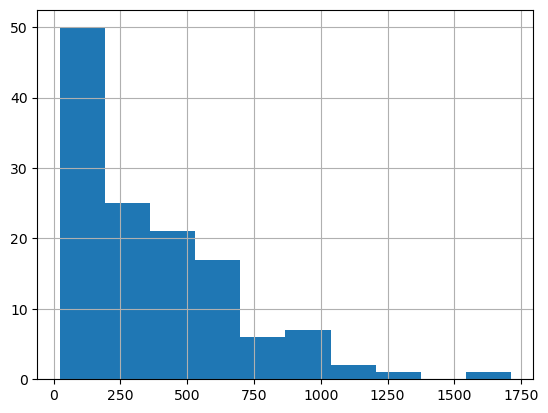

In [146]:
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()

<Axes: >

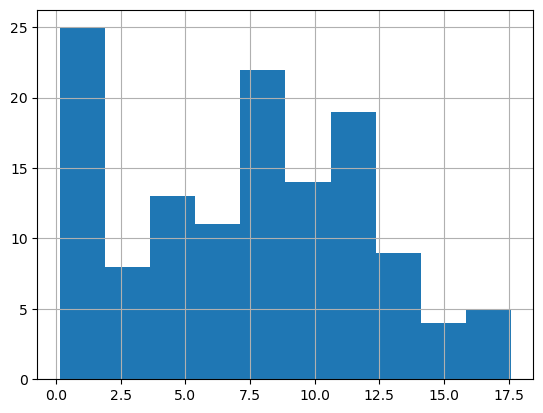

In [147]:
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()

In [148]:
from scipy.stats import iqr

In [149]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [150]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)

print(q1,q3)

446.66 1111.1525000000001


In [151]:
iqr = q3 - q1
iqr

664.4925000000001

In [152]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower, upper)

-550.0787500000001 2107.89125


In [153]:
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

In [155]:
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64

In [156]:
amir_deals = pd.read_csv('amir_deals.csv')

counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [160]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)


     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


In [166]:
restaurant_groups = pd.read_csv('restaurant_groups.csv', index_col=0)
restaurant_groups.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


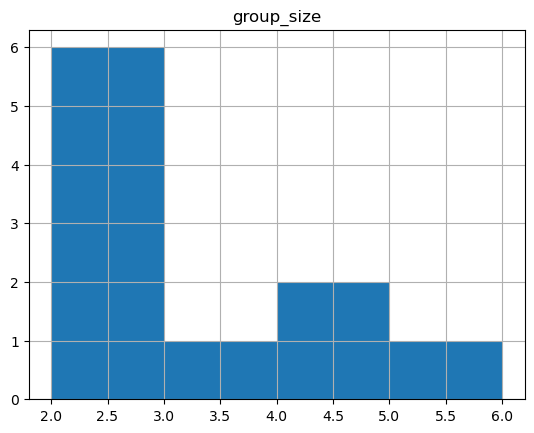

In [180]:
restaurant_groups.hist(bins = [2,3,4,5,6])
plt.show()

In [173]:
count = restaurant_groups['group_size'].value_counts()

count

group_size
2    6
4    2
6    1
3    1
Name: count, dtype: int64

In [174]:
size_dist = count/restaurant_groups.shape[0]

size_dist

group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64

In [175]:
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [176]:
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
print('The expected value is', expected_value)

The expected value is 2.9000000000000004


In [179]:
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
groups_4_or_more

,group_size,prob
1,4,0.2
2,6,0.1


In [178]:
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print('The probability is ',prob_4_or_more)

The probability is  0.30000000000000004


In [183]:
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1-uniform.cdf(5,0,30)
print(prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,0,30)-uniform.cdf(10,0,30)
print(prob_between_10_and_20)


0.16666666666666666
0.8333333333333334
0.3333333333333333


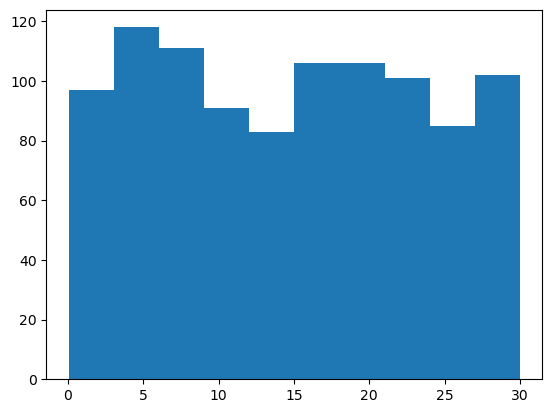

In [184]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()


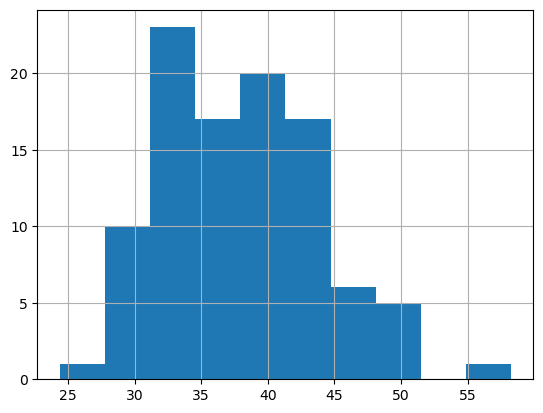

In [185]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()
